### Objetivo do projeto

O objetivo deste projeto de machine learning é prever se um solicitante terá seu empréstimo aprovado ou não, com base em um conjunto de características pessoais e financeiras. A predição de aprovação de empréstimo é baseada em diversas variáveis que influenciam a decisão final. O modelo de machine learning será treinado para aprender padrões e relações entre essas variáveis e o resultado da aprovação, que é o alvo (ou label) que queremos prever. Com um modelo bem treinado, será possível fornecer uma previsão rápida e precisa sobre a probabilidade de um empréstimo ser aprovado para novos solicitantes, auxiliando na tomada de decisões de crédito.

### Dados:

O conjunto de dados inclui as seguintes variáveis:

* Loan_ID: Identificação única de cada solicitação de empréstimo.
* Gender: Gênero do solicitante.
* Married: Status de casamento do solicitante.
* Dependents: Número de dependentes do solicitante.
* Education: Nível de escolaridade do solicitante.
* Self_Employed: Indicação se o solicitante é autônomo.
* ApplicantIncome: Renda mensal do solicitante.
* CoapplicantIncome: Renda mensal do co-solicitante, se houver.
* LoanAmount: Valor solicitado de empréstimo.
* Loan_Amount_Term: Prazo do empréstimo em meses.
* Credit_History: Histórico de crédito do solicitante.
* Property_Area: Localização do imóvel do solicitante.
* Loan_Status: Status de aprovação do empréstimo, que será o alvo (label) do modelo.


problema a ser resolvido/ benificio esperado

### Tecnologias:



### __Dados__:

O arquivo .csv que contém informações sobre compras de alunos, atividades e emissão de certificados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import accuracy_score,\
    classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,\
    cross_val_score, StratifiedKFold, KFold, GridSearchCV
from imblearn.over_sampling import SMOTE
# importando as bibliotecas dos modelos classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# importando a biblioteca de métricas
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")	
plt.style.use('fivethirtyeight')

### Verificando o Conjunto de Dados

In [2]:
# Carregando dataset em um pandas dataframe
cred_orig_df = pd.read_csv(r'C:\Users\SAMSUNG\Desktop\Projeto_Analise_de_Credito\Projeto_CredMoney\CredMoney\LoanData.csv')
cred_orig_df = cred_orig_df.drop(columns=['Loan_ID'])
cred_orig_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checando o formarto do dataset
cred_orig_df.shape
# 614 rows and 13 columns

(614, 12)

In [4]:
# Checando os tipos de dados do dataset
cred_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
# Verificando a existencia de valores nulos por coluna
cred_orig_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Tratando Valores Ausentes

In [6]:
# Tratando Valores Ausentes Variaveis Categoricas - Preenchendo com a moda
lista_cat = [
    'Gender',
    'Married',
    'Dependents',
    'Self_Employed'
]
for i in lista_cat:
    cred_orig_df[i] = cred_orig_df[i].fillna(cred_orig_df[i].mode()[0])
    print(cred_orig_df[i].isnull().sum())
# Verificando a existencia de valores nulos por coluna

0
0
0
0


In [7]:
cred_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
# Tratando Valores Ausentes Variaveis Numericas - Preenchendo com a mediana
lista_num = [
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History'
]
for i in lista_num:
    cred_orig_df[i] = cred_orig_df[i].fillna(cred_orig_df[i].median())
    print(cred_orig_df[i].isnull().sum())
# Verificando a existencia de valores nulos por coluna

0
0
0


In [9]:
cred_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Verificando a Existência de Outliers

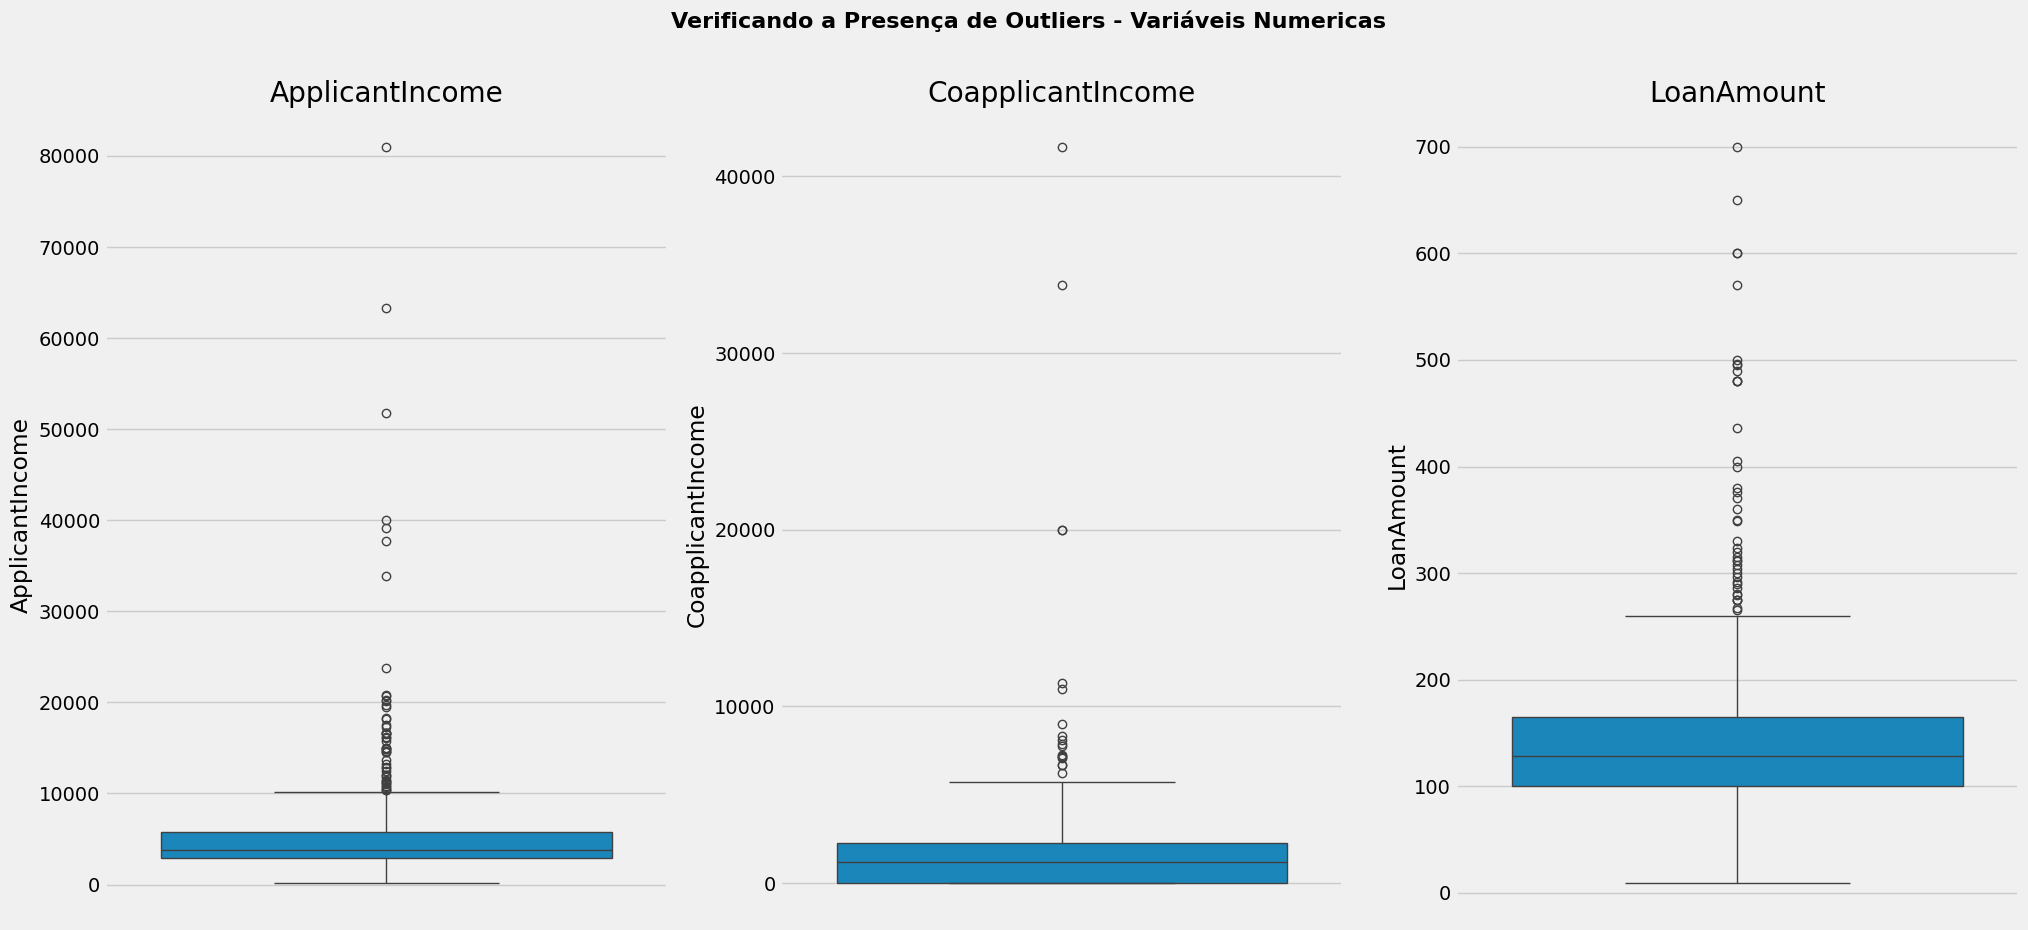

In [10]:
# Criando a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 10))
fig.suptitle('Verificando a Presença de Outliers - Variáveis Numericas', 
            fontsize=16, 
            fontweight='bold')

# Três boxplots (um em cada coluna)
sns.boxplot(data=cred_orig_df['ApplicantIncome'], ax=axes[0])
axes[0].set_title('ApplicantIncome')

sns.boxplot(data=cred_orig_df['CoapplicantIncome'], ax=axes[1])
axes[1].set_title('CoapplicantIncome')

sns.boxplot(data=cred_orig_df['LoanAmount'], ax=axes[2])
axes[2].set_title('LoanAmount')

# Ajusta o layout para evitar sobreposição
#plt.tight_layout()
#plt.subplots_adjust(top=0.9)  # Ajusta o espaço para o título principal
plt.show()

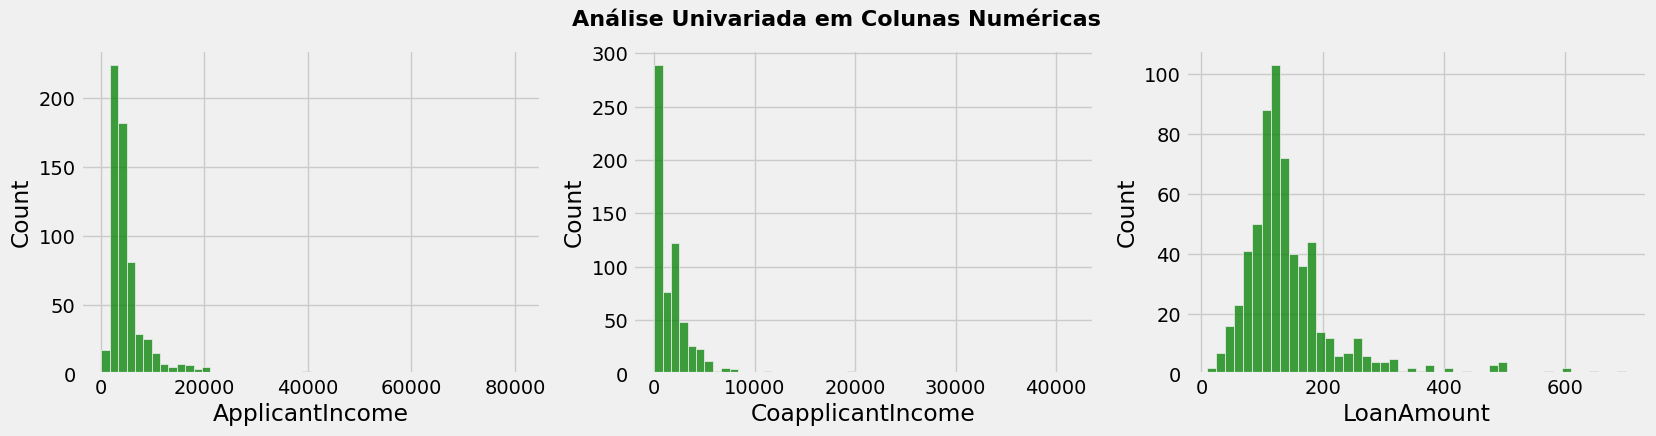

In [11]:
plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1, 3, 1)
sns.histplot(cred_orig_df['ApplicantIncome'], color = 'green')
 
plt.subplot(1, 3, 2)
sns.histplot(cred_orig_df['CoapplicantIncome'], color = 'green')
 
plt.subplot(1, 3, 3)
sns.histplot(cred_orig_df['LoanAmount'], color = 'green')
 
plt.suptitle('Análise Univariada em Colunas Numéricas', 
            fontsize=16, 
            fontweight='bold')
plt.show()

### Estatistica Descritiva

In [12]:
# Analisandos as metricas estatisticas do dataset
cred_orig_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Observando o dataset nota se que ha presença de outliers, e também a distribuição dos dados não segue uma normal, pela amostra pequena e por conta da distribuição, será adotada uma transformação logaritmica. A heterocedasticidade pode ser causada por diversos fatores, como a presença de valores discrepantes (outliers).

* **log1p():** para dados com zeros ou outliers menores.
* **log():** para dados grandes e sem zeros.

In [13]:
#Aplicar a tranformação log para remoção de skewness (assimetria - log1p) e heterocedasticidade (outliers - log)
cred_orig_df['ApplicantIncome'] = np.log1p(cred_orig_df['ApplicantIncome'])
cred_orig_df['CoapplicantIncome'] = np.log1p(cred_orig_df['CoapplicantIncome'])
cred_orig_df['LoanAmount'] = np.log(cred_orig_df['LoanAmount'])

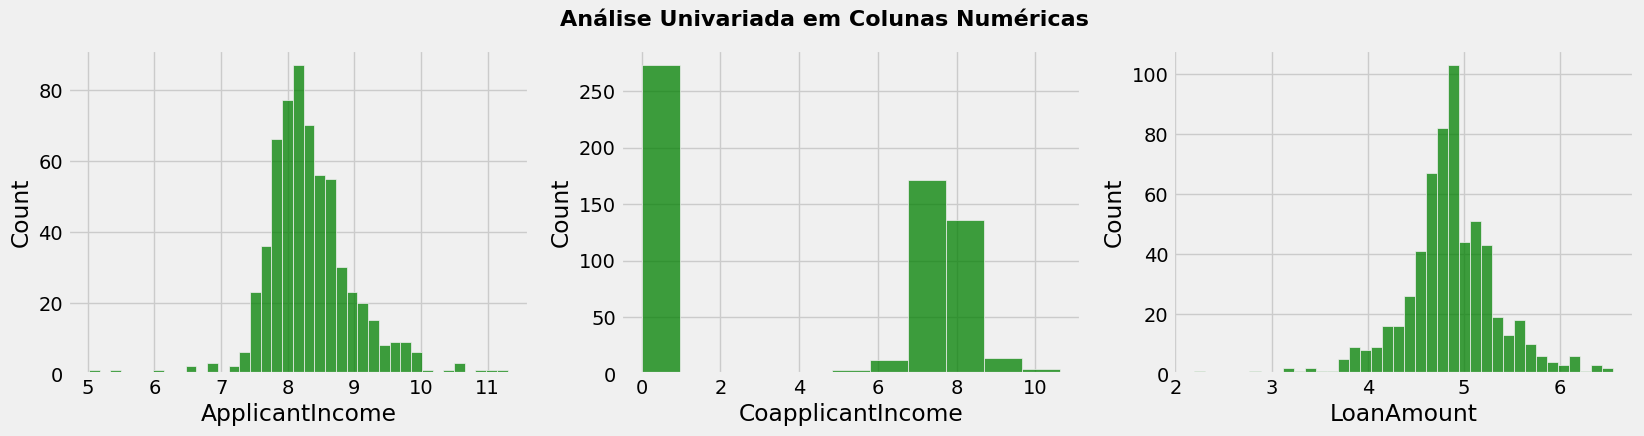

In [14]:
plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1, 3, 1)
sns.histplot(cred_orig_df['ApplicantIncome'], color = 'green')
plt.subplot(1, 3, 2)
sns.histplot(cred_orig_df['CoapplicantIncome'], color = 'green')
plt.subplot(1, 3, 3)
sns.histplot(cred_orig_df['LoanAmount'], color = 'green')
plt.suptitle('Análise Univariada em Colunas Numéricas', 
            fontsize=16, 
            fontweight='bold')
plt.show()

### Processo de Encoding

In [15]:
# Transformação Binaria
list_bi1 = [
    'Married',
    'Self_Employed'
    ]    
for i in list_bi1:
    cred_orig_df[i] = cred_orig_df[i].replace(('Yes', 'No'), (1, 0))      

cred_orig_df['Gender'] = cred_orig_df['Gender'].replace(('Male', 'Female'), (1, 0))
cred_orig_df['Education'] = cred_orig_df['Education'].replace(('Graduate', 'Not Graduate'), (1, 0))
cred_orig_df['Loan_Status'] = cred_orig_df['Loan_Status'].replace(('Y', 'N'), (1, 0))
cred_orig_df['Property_Area'] = cred_orig_df['Property_Area'].replace(('Urban', 'Semiurban', 'Rural'), (1, 1, 0))
cred_orig_df['Dependents'] = cred_orig_df['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3))

In [16]:
cred_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


### Pré-Processamento dos Dados

In [17]:
# Isolando as variáveis independentes
X = cred_orig_df.drop(columns=['Loan_Status'])

# Isolando a variável dependente
y = cred_orig_df['Loan_Status']


print('Variaveis Independentes: ', X.shape)
print('Variavel Dependente: ', y.shape)

Variaveis Independentes:  (614, 11)
Variavel Dependente:  (614,)


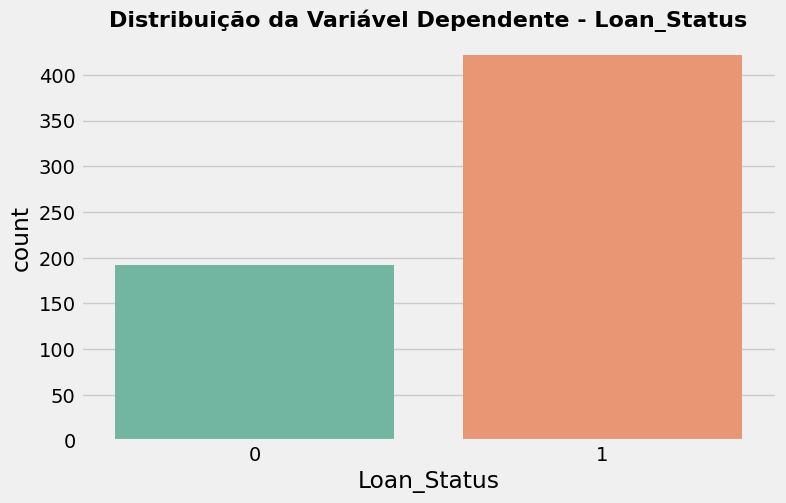

In [18]:
# Analisando a distribuição mdas classes da variável dependente
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='Set2')  #, palette='pastel'
plt.title(
    'Distribuição da Variável Dependente - Loan_Status',
    loc='center', 
    fontsize=16, 
    fontweight='bold')
plt.show()

In [19]:
cred_orig_df.groupby('Loan_Status')['Loan_Status']\
    .count()\
        .to_frame()\
            .rename(columns={'Loan_Status': 'Count'})\
                .reset_index(drop=True)\
                    .sort_values(by='Count', ascending=False).T

,1,0
Count,422,192


In [20]:
# Isandos o conjundo de dados em treino e teste


x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.10,
    stratify = y,
    random_state = 100)

print('Shape do Conjunto de Treino: ', x_train.shape, y_train.shape)
print('Shape do Conjunto de Teste: ', x_test.shape, y_test.shape)

Shape do Conjunto de Treino:  (552, 11) (552,)
Shape do Conjunto de Teste:  (62, 11) (62,)


In [21]:
df_train = pd.concat([x_train, y_train], axis=1)

df_train.groupby('Loan_Status')['Loan_Status']\
    .count()\
        .to_frame()\
            .rename(columns={'Loan_Status': 'Count'})\
                .reset_index(drop=True)\
                    .sort_values(by='Count', ascending=False).T

,1,0
Count,379,173


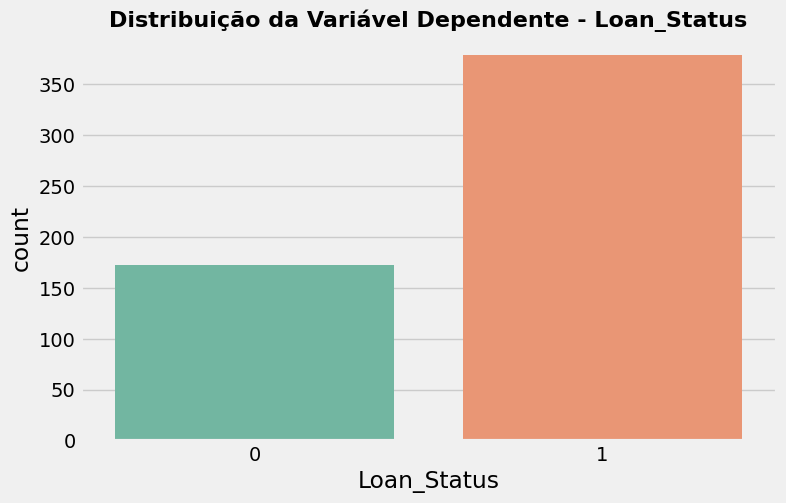

In [22]:
# Analisando a distribuição mdas classes da variável dependente
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')  #, palette='pastel'
plt.title(
    'Distribuição da Variável Dependente - Loan_Status',
    loc='center', 
    fontsize=16, 
    fontweight='bold')
plt.show()

In [23]:
# Tratando desbalanceamento de classes na variável dependente - Antes Balanceamento
smote = SMOTE()
X_bal, y_bal = smote.fit_resample(x_train, y_train)

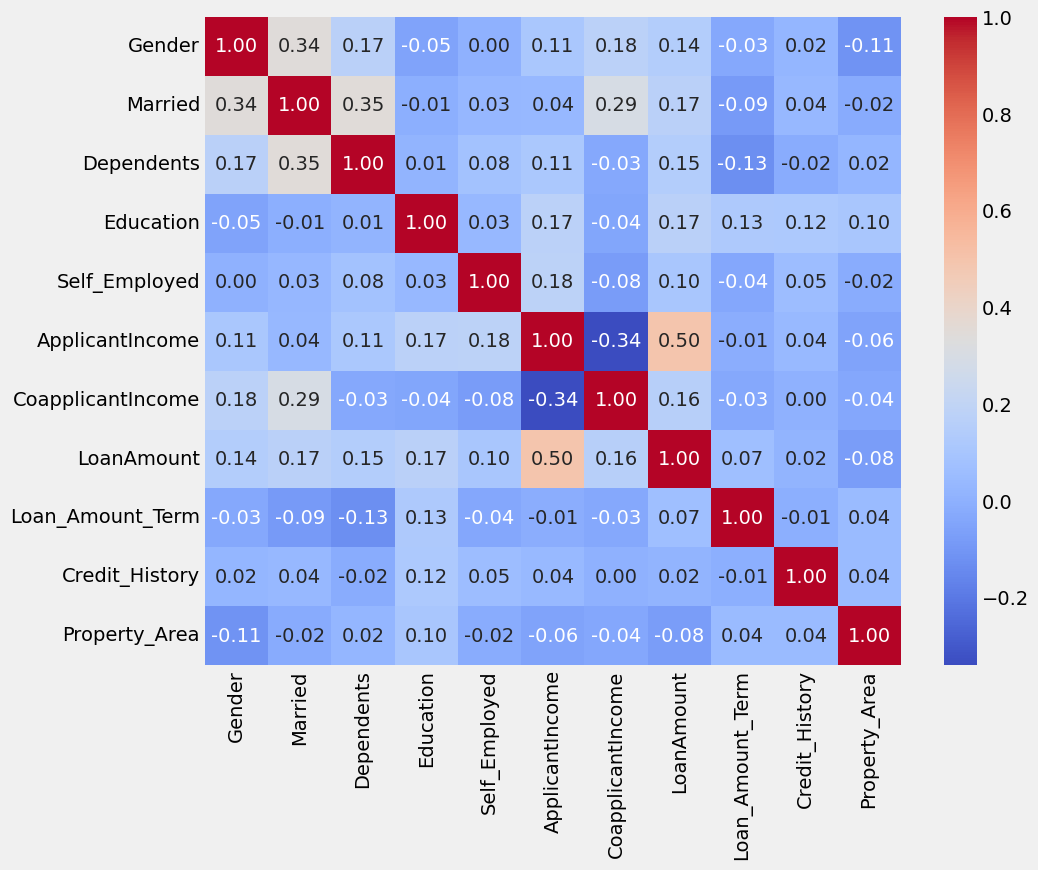

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    pd.DataFrame(X_bal).corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm')
plt.show()

In [25]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler()
#X_bal, y_bal = ros.fit_resample(x_train, y_train)

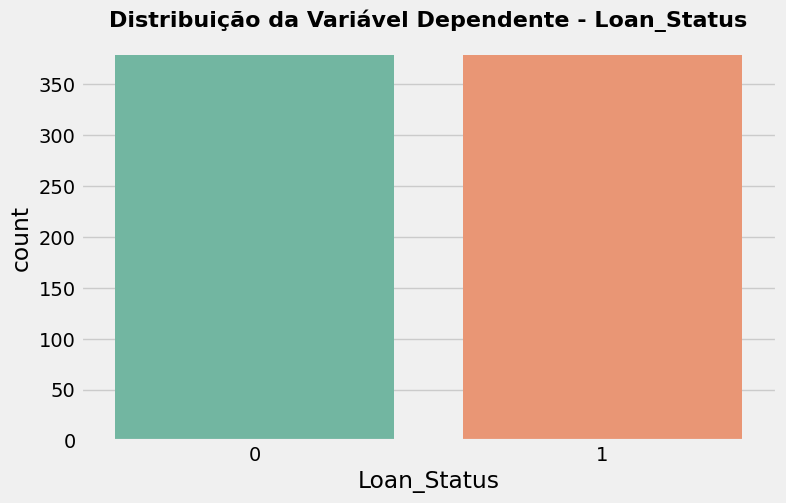

In [26]:
# Analisando a distribuição das classes da variável dependente - Após Balanceamento
plt.figure(figsize=(8, 5))
sns.countplot(x=y_bal, palette='Set2')  #, palette='pastel'
plt.title(
    'Distribuição da Variável Dependente - Loan_Status',
    loc='center', 
    fontsize=16, 
    fontweight='bold')
plt.show()

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica popular para lidar com o desbalanceamento de classes. Em vez de simplesmente duplicar exemplos da classe minoritária (como faz a sobremostragem tradicional), o SMOTE cria novos exemplos sintéticos. Esses novos exemplos são gerados através da interpolação entre exemplos reais da classe minoritária.



### Processamento dos Dados

In [27]:
# definindo uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_bal, y_bal)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(x_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7580645161290323
Precision: 0.8333333333333334
Recall: 0.813953488372093
GaussianNB
****Results****
Accuracy: 0.7419354838709677
Precision: 0.7647058823529411
Recall: 0.9069767441860465
LogisticRegression
****Results****
Accuracy: 0.8064516129032258
Precision: 0.8297872340425532
Recall: 0.9069767441860465
SVC
****Results****
Accuracy: 0.6612903225806451
Precision: 0.6833333333333333
Recall: 0.9534883720930233
DecisionTreeClassifier
****Results****
Accuracy: 0.7419354838709677
Precision: 0.813953488372093
Recall: 0.813953488372093
RandomForestClassifier
****Results****
Accuracy: 0.7741935483870968
Precision: 0.8085106382978723
Recall: 0.8837209302325582
GradientBoostingClassifier
****Results****
Accuracy: 0.7419354838709677
Precision: 0.7872340425531915
Recall: 0.8604651162790697
XGBClassifier
****Results****
Accuracy: 0.7903225806451613
Precision: 0.8260869565217391
Recall: 0.8837209302325582


1º Etapa: Disputa de modelos

2º Etapa: Refinmanto do Modelo Selecionado

In [28]:
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier()
    ]
lista = []
for clf in classifiers:
    tabela = {}
    # instanciando o modelo
    clf.fit(X_bal, y_bal)
    y_pred = clf.predict(x_test)

    
    
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    tabela["Modelo"] = name      
    tabela["Accuracy"] = sklearn.metrics.accuracy_score(y_test, y_pred)
    tabela["Precision"] = sklearn.metrics.precision_score(y_test, y_pred)
    tabela["Recall"] = sklearn.metrics.recall_score(y_test, y_pred)
    tabela["AUC"] = sklearn.metrics.roc_auc_score(y_test, y_pred)
    tabela["F1 Score"] = sklearn.metrics.f1_score(y_test, y_pred)
    lista.append(tabela)

[LightGBM] [Info] Number of positive: 379, number of negative: 379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [29]:
pd.DataFrame(lista)  

,Modelo,Accuracy,Precision,Recall,AUC,F1 Score
0,KNeighborsClassifier,0.758065,0.833333,0.813953,0.722766,0.823529
1,GaussianNB,0.741935,0.764706,0.906977,0.637699,0.829787
2,LogisticRegression,0.806452,0.829787,0.906977,0.742962,0.866667
3,SVC,0.661290,0.683333,0.953488,0.476744,0.796117
4,DecisionTreeClassifier,0.774194,0.822222,0.860465,0.719706,0.840909
5,RandomForestClassifier,0.790323,0.826087,0.883721,0.731334,0.853933
6,GradientBoostingClassifier,0.741935,0.787234,0.860465,0.667075,0.822222
7,XGBClassifier,0.790323,0.826087,0.883721,0.731334,0.853933
8,LGBMClassifier,0.822581,0.880952,0.860465,0.798654,0.870588


A precisão melhora à medida que os falsos positivos diminuem, enquanto o recall melhora quando os falsos negativos diminuem

In [30]:
lgm = LGBMClassifier(
    n_estimators=1000,
    class_weight='balanced')#predict_disable_shape_check=True

lgm.fit(X_bal, y_bal)
y_pred = lgm.predict(x_test)

[LightGBM] [Info] Number of positive: 379, number of negative: 379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

learning_rate=0.01,
                    n_estimators=10000,
                    objective='binary',
                    class_weight='balanced'

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.90      0.81      0.85        43

    accuracy                           0.81        62
   macro avg       0.77      0.80      0.78        62
weighted avg       0.82      0.81      0.81        62



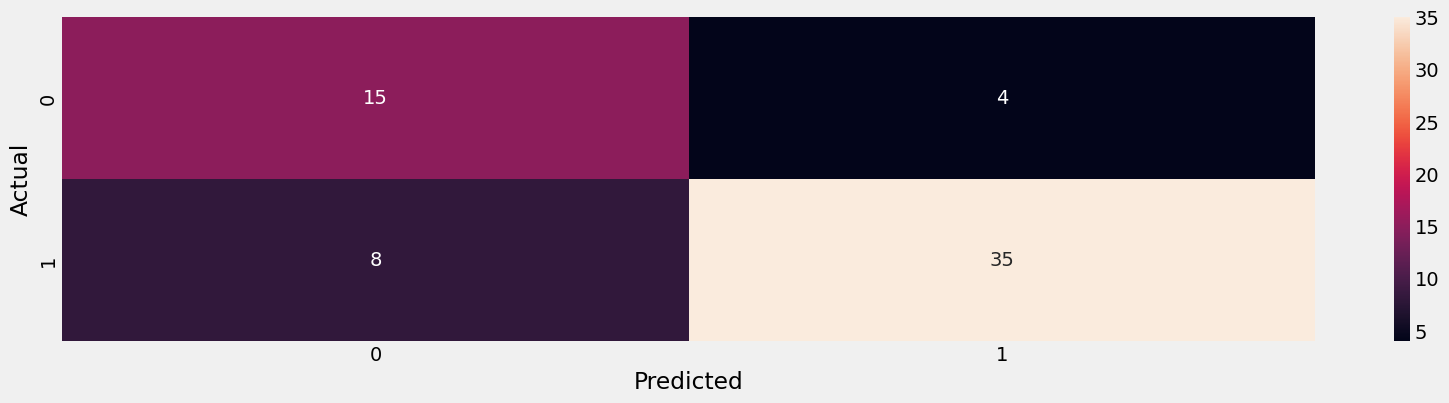

0.8064516129032258


In [31]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy_score(y_test, y_pred))

1. ### Acurácia (Accuracy)
A acurácia representa a proporção de previsões corretas em relação ao total de previsões. Em outras palavras, é a fração de exemplos em que o modelo acertou.

É calculada da seguinte forma:

**Acurácia** = VP+VN / VP+FP+FN+VN
 
Embora seja uma métrica bastante intuitiva, a acurácia pode ser enganadora em datasets desbalanceados. Imagine um dataset onde 95% das instâncias pertencem a uma classe negativa; um modelo que sempre prediz “negativo” terá alta acurácia, mas falhará em identificar os exemplos positivos.

2. ### Precisão (Precision)
A precisão indica quantas das previsões positivas feitas pelo modelo são realmente positivas. Esta é uma métrica importante quando o custo de um falso positivo é elevado, como em diagnóstico de doenças graves.

É calculada da seguinte forma:

**Precisão** = VP / VP+FP
 
É relevante quando se deseja minimizar falsos positivos.

3. ### Recall (Sensibilidade)
O recall, ou sensibilidade, indica quantos dos exemplos positivos foram corretamente identificados pelo modelo. Essa métrica é essencial quando o custo de um falso negativo é alto, como em sistemas de segurança ou em diagnóstico médico. É calculado assim:

**Recall** = VP / VP+FN
 
Ele é importante quando o objetivo é minimizar falsos negativos.

4. ### F1-Score
O F1-Score é a média harmônica entre precisão e recall. é a média harmônica entre precisão e recall. Ele é particularmente útil quando buscamos um equilíbrio entre esses dois aspectos:

**F1** = 2*(Precisão*Recall / Precisão+Recall)
 
Um F1-Score alto indica que o modelo é consistente tanto em identificar verdadeiros positivos quanto em evitar falsos positivos.

Etapa Final: Avaliando o Modelos


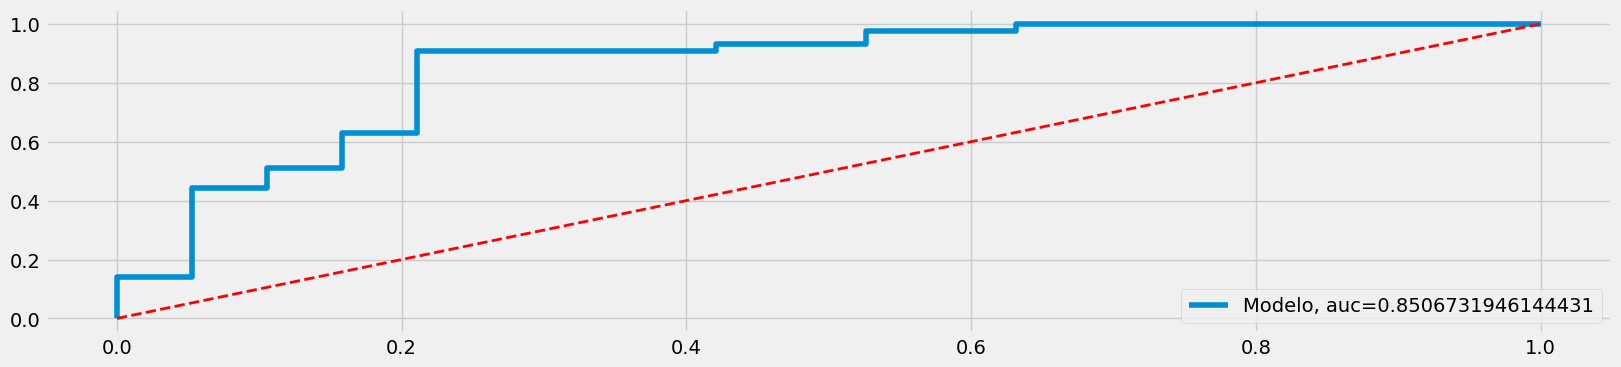

In [32]:
# plotando a curva ROC
y_pred_proba = lgm.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Modelo, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

### Salvando o Conjundo de Teste

In [33]:
X_bal.to_csv('x_teste.csv', index=False)

### Salvando o Modelo

alvar o modelo em formato pickle para que possamos utiliza-lo em nossas futuras predições com dados novos

In [34]:
import pickle
pickle.dump(lgm, open('Analise_de_Credito_BANK.pkl', 'wb'))
